In [1247]:
import warnings
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn import linear_model
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dense
from sklearn.tree import DecisionTreeRegressor
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
warnings.filterwarnings("ignore")

In [1248]:
df=pd.read_csv(r"\Users\Family\Downloads\archive (2)\hou_all.csv",header=None)

In [1249]:
feature_names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE',
                'DIS','RAD','TAX','PTRATIO','B','LSTAT','PRICE','v']
df.columns = feature_names  

In [1250]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,v
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,1
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


CRIM: per capita crime rate by town

ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: proportion of non_retial business acres per town

CHAS: Charles River dummy variable (equal 1 if track nbounds river and 0 otherwise)

NOX: nitric oxides concetration (parts per 10 million)

RM: average number of rooms per dwelling 

AGE: proportionrtion of owner-occupied units built prior to 1940

DIS: weighted distances to five Boston employment centers

RAD: index of accessibility to radial highways

TAX: full-value property-tax rate per $10,000

PTRATIO: pupil-teacher ratio by town

B: 1000(BK - 0.63)^2 where BK is the proportion of blacks by town

LSTAT: % lower status of the population

PRICE (MEDV): Median value of owner-occupied homes in $1000's
    

In [1251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
 14  v        506 non-null    int64  
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [1252]:
x=df.drop(['PRICE','v'],axis=1)
y=df['PRICE']

In [1253]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=46)

In [1254]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [1255]:
tf.random.set_seed(0)
model = Sequential()
model.add(Dense(128,input_dim=13,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='linear'))

In [1256]:
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mae'])

In [1257]:
model.summary()

Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_159 (Dense)           (None, 128)               1792      
                                                                 
 dense_160 (Dense)           (None, 64)                8256      
                                                                 
 dense_161 (Dense)           (None, 1)                 65        
                                                                 
Total params: 10113 (39.50 KB)
Trainable params: 10113 (39.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [1258]:
history=model.fit(x_train_scaled,y_train,validation_split=0.2,epochs=155)

Epoch 1/155
11/11 [==============================] - 2s 44ms/step - loss: 613.8728 - mae: 22.8584 - val_loss: 497.8931 - val_mae: 20.5156
Epoch 2/155
11/11 [==============================] - 0s 9ms/step - loss: 557.5847 - mae: 21.5750 - val_loss: 442.3434 - val_mae: 19.1035
Epoch 3/155
11/11 [==============================] - 0s 10ms/step - loss: 492.0246 - mae: 20.0647 - val_loss: 373.8744 - val_mae: 17.2968
Epoch 4/155
11/11 [==============================] - 0s 9ms/step - loss: 408.9019 - mae: 18.0492 - val_loss: 287.2453 - val_mae: 14.9198
Epoch 5/155
11/11 [==============================] - 0s 9ms/step - loss: 304.9436 - mae: 15.3011 - val_loss: 188.4126 - val_mae: 11.8202
Epoch 6/155
11/11 [==============================] - 0s 9ms/step - loss: 194.0822 - mae: 11.7717 - val_loss: 100.6293 - val_mae: 8.2101
Epoch 7/155
11/11 [==============================] - 0s 10ms/step - loss: 107.9594 - mae: 8.3017 - val_loss: 53.9949 - val_mae: 5.5679
Epoch 8/155
11/11 [=======================

Epoch 62/155
11/11 [==============================] - 0s 9ms/step - loss: 11.2181 - mae: 2.3791 - val_loss: 11.2630 - val_mae: 1.9892
Epoch 63/155
11/11 [==============================] - 0s 8ms/step - loss: 11.0651 - mae: 2.3588 - val_loss: 11.1972 - val_mae: 1.9758
Epoch 64/155
11/11 [==============================] - 0s 9ms/step - loss: 11.0858 - mae: 2.3611 - val_loss: 11.0964 - val_mae: 1.9616
Epoch 65/155
11/11 [==============================] - 0s 9ms/step - loss: 10.9051 - mae: 2.3564 - val_loss: 11.1033 - val_mae: 1.9566
Epoch 66/155
11/11 [==============================] - 0s 9ms/step - loss: 10.8233 - mae: 2.3333 - val_loss: 10.8217 - val_mae: 1.9367
Epoch 67/155
11/11 [==============================] - 0s 9ms/step - loss: 10.7425 - mae: 2.3200 - val_loss: 10.9917 - val_mae: 1.9423
Epoch 68/155
11/11 [==============================] - 0s 9ms/step - loss: 10.6810 - mae: 2.3253 - val_loss: 10.9074 - val_mae: 1.9405
Epoch 69/155
11/11 [==============================] - 0s 9ms/s

11/11 [==============================] - 0s 9ms/step - loss: 7.9675 - mae: 2.0709 - val_loss: 9.4970 - val_mae: 2.0963
Epoch 124/155
11/11 [==============================] - 0s 9ms/step - loss: 7.3790 - mae: 1.9621 - val_loss: 9.7622 - val_mae: 2.0523
Epoch 125/155
11/11 [==============================] - 0s 9ms/step - loss: 7.3561 - mae: 1.9425 - val_loss: 9.3993 - val_mae: 2.0354
Epoch 126/155
11/11 [==============================] - 0s 9ms/step - loss: 7.0413 - mae: 1.9202 - val_loss: 9.2587 - val_mae: 2.0422
Epoch 127/155
11/11 [==============================] - 0s 8ms/step - loss: 7.0459 - mae: 1.9104 - val_loss: 8.9757 - val_mae: 1.9397
Epoch 128/155
11/11 [==============================] - 0s 9ms/step - loss: 6.8580 - mae: 1.8795 - val_loss: 9.4998 - val_mae: 2.0450
Epoch 129/155
11/11 [==============================] - 0s 10ms/step - loss: 6.8256 - mae: 1.8885 - val_loss: 9.2804 - val_mae: 1.9870
Epoch 130/155
11/11 [==============================] - 0s 12ms/step - loss: 7.1648

In [1259]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss) + 1)

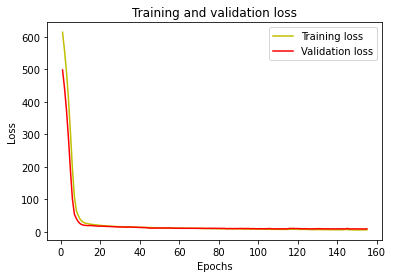

In [1260]:
plt.plot(epochs,loss,'y',label='Training loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [1261]:
acc = history.history['mae']
val_acc = history.history['val_mae']

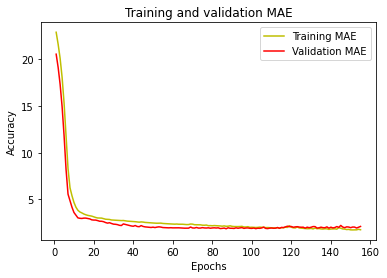

In [1262]:
plt.plot(epochs,acc,'y',label='Training MAE')
plt.plot(epochs,val_acc,'r',label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [1268]:
predictions = model.predict(x_train_scaled[:5])
print("Predicted values are: ")
print(predictions)
print("   -------------------------------------------------------   ")
print("real values are: ")
print(y_train[:5])

1/1 [==============================] - 0s 43ms/step
Predicted values are: 
[[43.197243]
 [17.524687]
 [21.16437 ]
 [16.176231]
 [17.62419 ]]
   -------------------------------------------------------   
real values are: 
282    46.0
48     14.4
12     21.7
31     14.5
315    16.2
Name: PRICE, dtype: float64


In [1269]:
np.random.seed(0)

In [1270]:
mse_neural, mae_neural = model.evaluate(x_test_scaled,y_test)
print('Mean squared error from neural net: ',mse_neural)
print('Mean absolute error from neural net: ',mae_neural)

4/4 [==============================] - 0s 4ms/step - loss: 7.6204 - mae: 2.1163
Mean squared error from neural net:  7.620363712310791
Mean absolute error from neural net:  2.11627459526062


In [1271]:
model=RandomForestRegressor(n_estimators=60,random_state=42)
model.fit(x_train_scaled,y_train)
y_pred_RF=model.predict(x_test_scaled)
mse_RF = mean_squared_error(y_test,y_pred_RF)
mae_RF=mean_absolute_error(y_test,y_pred_RF)
print('Mean squared error from random forest: ',mse_RF)
print('Mean absolute error from random forest: ',mae_RF)

Mean squared error from random forest:  7.2817691448801725
Mean absolute error from random forest:  2.012990196078431


In [1272]:
lr_model=linear_model.LinearRegression()
lr_model.fit(x_train_scaled,y_train)
y_pred_lr=lr_model.predict(x_test_scaled)
mse_lr = mean_squared_error(y_test,y_pred_lr)
mae_lr=mean_absolute_error(y_test,y_pred_lr)
print('Mean squared error from linear regression: ',mse_lr)
print('Mean absolute error from linear regression: ',mae_lr)

Mean squared error from linear regression:  13.510777780095683
Mean absolute error from linear regression:  2.8818195347234985


In [1273]:
feature_list = list(x.columns)
feature_imp=pd.Series(model.feature_importances_,index=feature_list).sort_values(ascending=False)
feature_imp

LSTAT      0.453635
RM         0.348420
DIS        0.061733
CRIM       0.044400
NOX        0.023331
PTRATIO    0.018047
AGE        0.013657
TAX        0.013455
B          0.010837
INDUS      0.004969
RAD        0.004520
CHAS       0.001536
ZN         0.001459
dtype: float64